we will create a classification model from the set of methods that can predict if someone will develop diabetes over the next 5 year

# Import Python Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore') 


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import matthews_corrcoef
import joblib 
#we will import library for neccesary dataframe and numeric analysis
#import model for classification from sklearn
#joblib to save trained model
# load the dataset

df = pd.read_csv('diabetes-2.csv')



# Exploratory Data Analysis 

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Check for missing values
df.isnull().sum()





Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

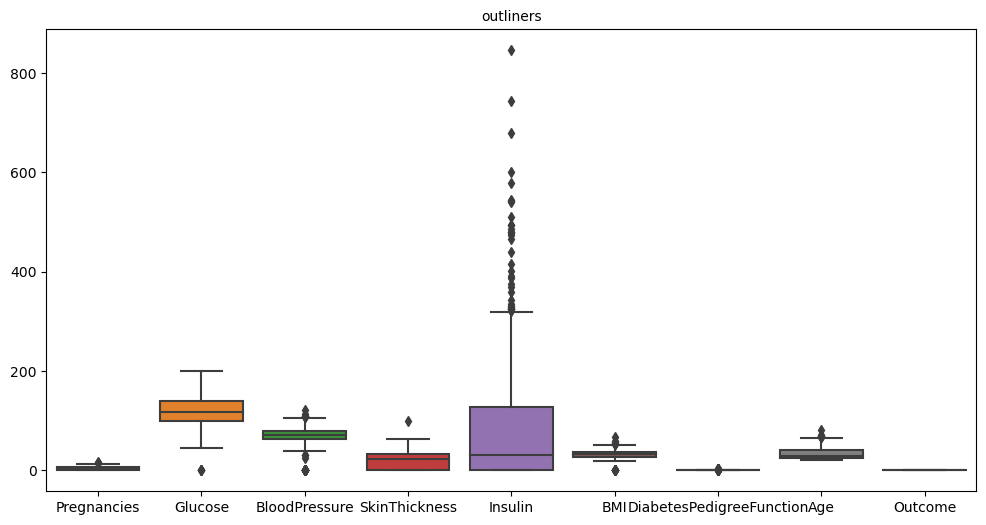

In [5]:
#check for outliners 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("outliners", fontsize=10)
plt.show()



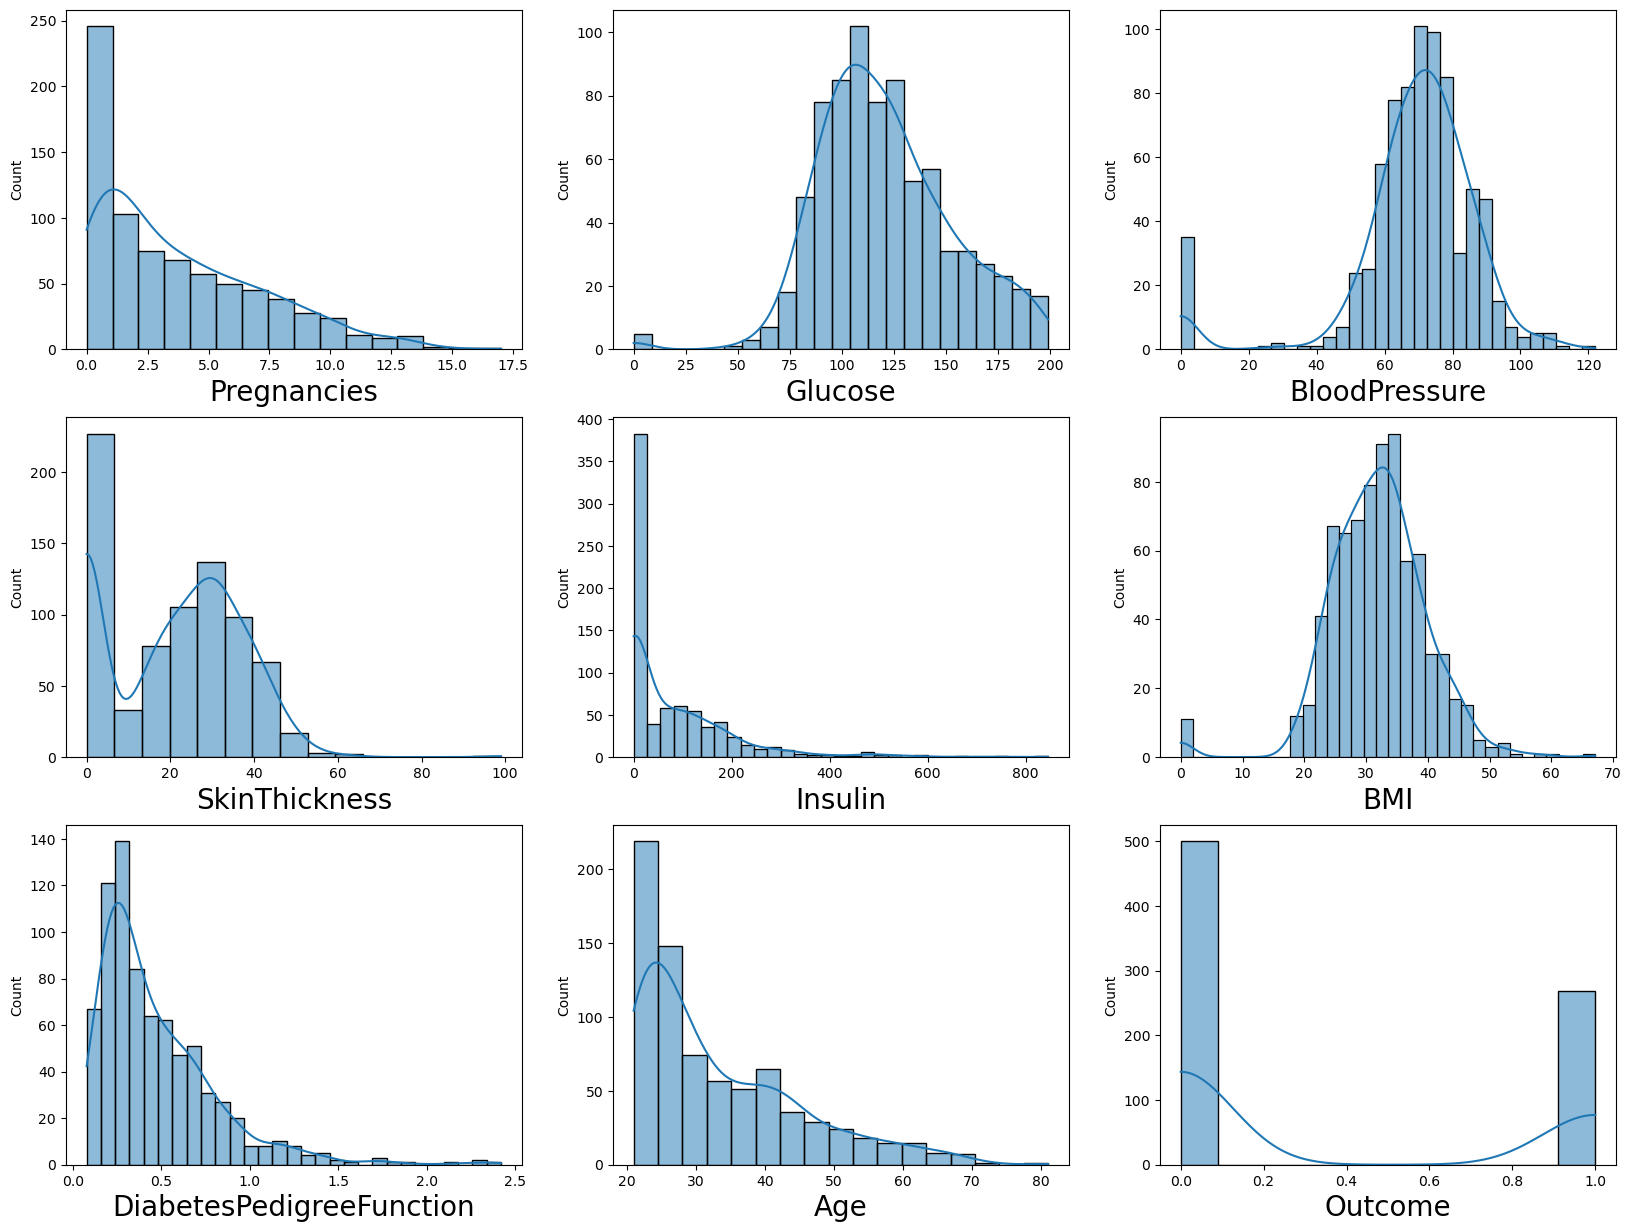

In [6]:
# Visualizing the distribution of the variables
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [7]:
# we will find the correlation between the features and plot the correlation matrix
corr = df.corr()
print(corr)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

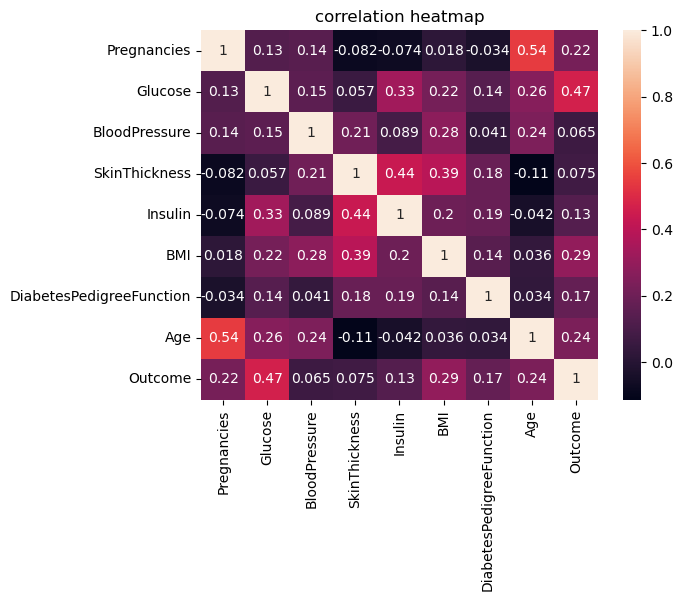

In [8]:
#sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)


correl_matrix = df.corr()
sns.heatmap(correl_matrix, annot=True)
plt.title("correlation heatmap")
plt.show()

dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

# Data Preprocessing 

In [9]:
#standardize the range of values of features in the dataset to ensure that they have a similar scale
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [10]:
# split into, training, testing, checking data to aviod overfitting on unseen model 
dfTrain = df[df.index < 650]
dfTest = df[(df.index >= 650) & (df.index < 750)]
dfCheck = df[df.index >= 750]


In [11]:
#separating the features and labels from the training and testing subsets
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome', axis=1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome', axis=1))

trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome', axis=1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome', axis=1))


In [12]:
#we will perform feature scaling on the training and testing datasets 

means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means) / stds
testData = (testData - means) / stds
#the mean of each feature should be close to zero and the standard deviation should be close to one.
np.mean(trainData, axis=0)  
np.std(trainData, axis=0)  

array([1., 1., 1., 1., 1., 1., 1., 1.])

# Model Selection 

For our prediction, we will use some classification models.

Logistic Regression: a linear model used for binary classification problems.

Decision Tree: It is a tree-based model that is used for both classification and regression problems.

Random Forest: It is an ensemble model that consists of multiple decision trees.

Support Vector Machine: It is a powerful model that works well for both linearly and non-linearly separable datasets. 

K-Nearest Neighbors: It is a simple non-parametric model that does not make any assumptions about the underlying data distribution. 


In [13]:
#we will create a dictionary for the model

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': rfc(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

#next, Create empty DataFrame to store the evaluation metrics of each model
results_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-score', 'ROC AUC'])

#we will loop through each model
# Calculate  evaluation metrics for each model
for model_name, model in models.items():
    model.fit(trainData, trainLabel)
    testPredictions = model.predict(testData)
    accuracy = accuracy_score(testLabel, testPredictions)
    precision = precision_score(testLabel, testPredictions)
    recall = recall_score(testLabel, testPredictions)
    tn, fp, fn, tp = confusion_matrix(testLabel, testPredictions).ravel()
    specificity = tn / (tn + fp)
    f1score = f1_score(testLabel, testPredictions)
    rocauc = roc_auc_score(testLabel, testPredictions)
    
    # Add results to DataFrame
    results_df.loc[model_name] = [accuracy, precision, recall, specificity, f1score, rocauc]

# Display results,to compare the performance of several models on a given dataset and identify the best model.
print(results_df)

# Create bar plot for each metric



                        Accuracy  Precision    Recall  Specificity  F1-score  \
Logistic Regression         0.78   0.741935  0.621622     0.873016  0.676471   
Decision Tree               0.69   0.588235  0.540541     0.777778  0.563380   
Random Forest               0.72   0.666667  0.486486     0.857143  0.562500   
Support Vector Machine      0.75   0.730769  0.513514     0.888889  0.603175   
K-Nearest Neighbors         0.71   0.625000  0.540541     0.809524  0.579710   

                         ROC AUC  
Logistic Regression     0.747319  
Decision Tree           0.659159  
Random Forest           0.671815  
Support Vector Machine  0.701201  
K-Nearest Neighbors     0.675032  


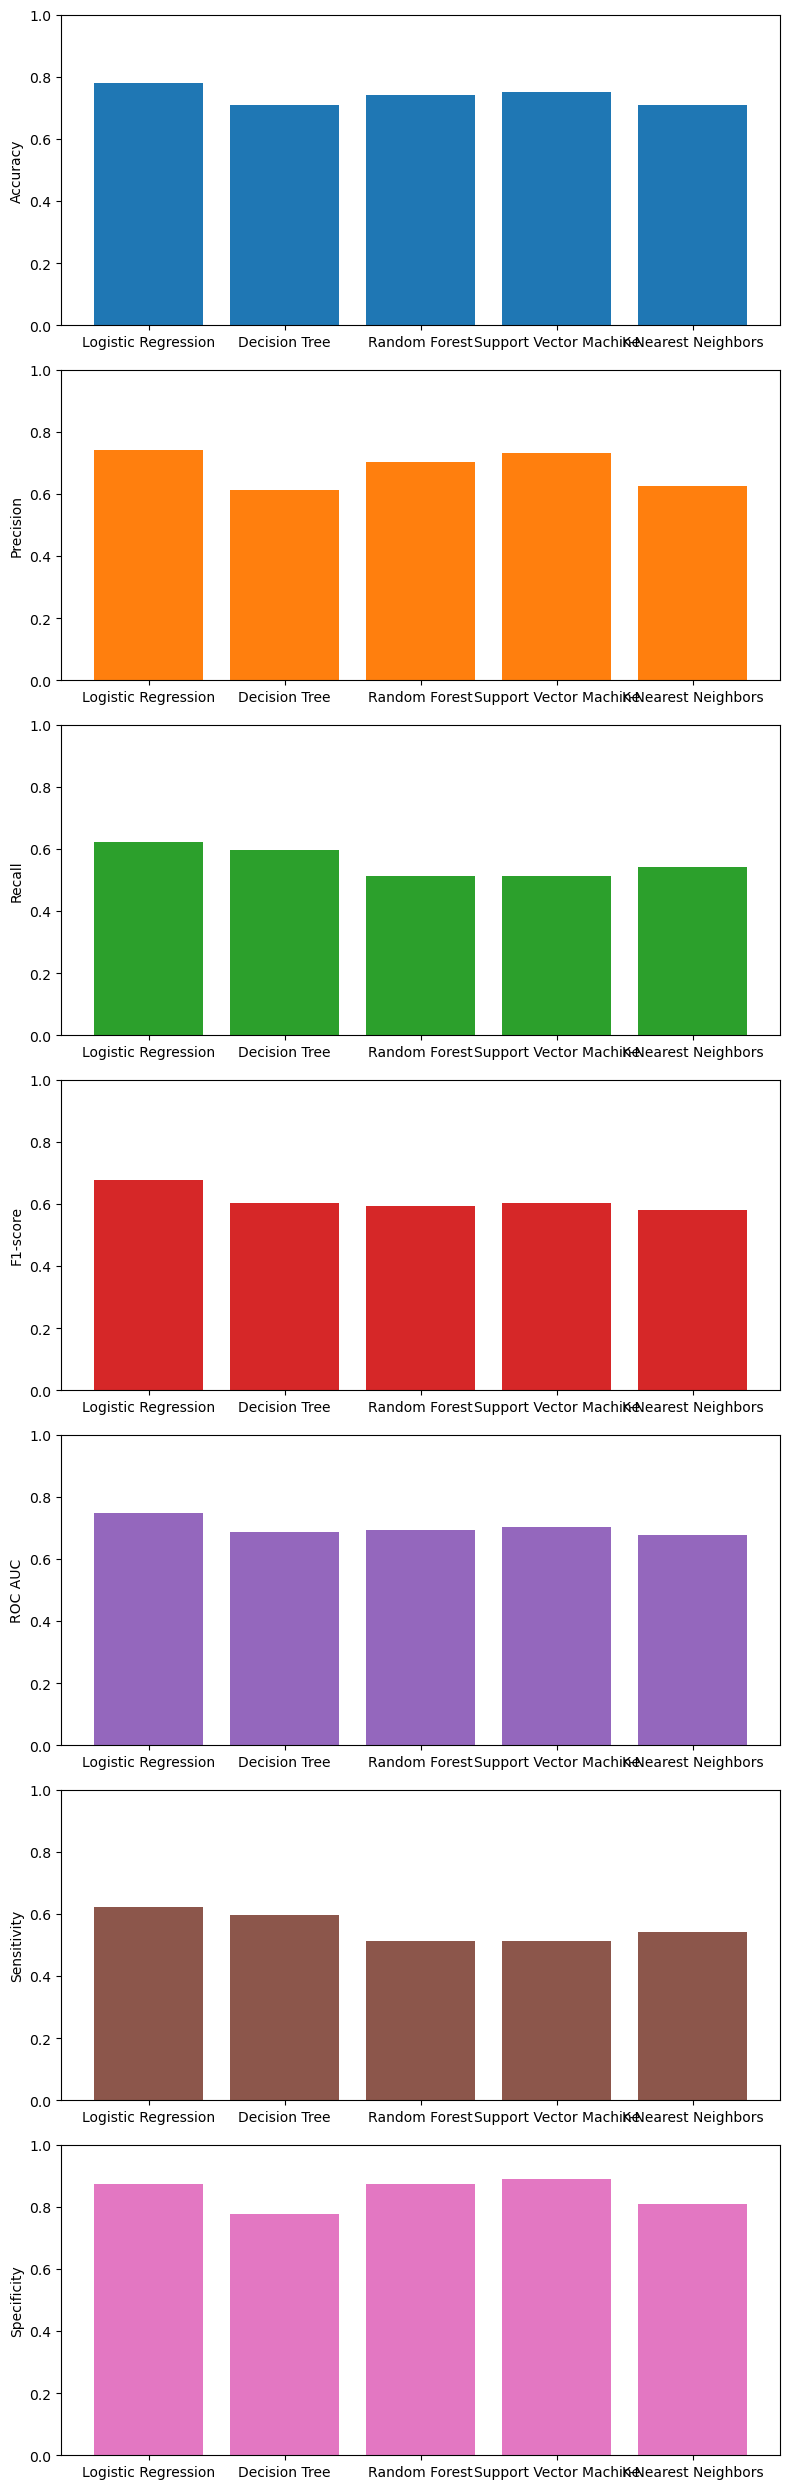

In [14]:
#we want to display the result in a bar chart for more visuals, and aesthetics 😜

# Create dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': rfc(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize lists to store metric values for each model
accuracy_list = []
precision_list = []
recall_list = []
f1score_list = []
rocauc_list = []
sensitivity_list = []
specificity_list = []

# Loop over models and calculate metrics
for model_name, model in models.items():
    model.fit(trainData, trainLabel)
    testPredictions = model.predict(testData)
    accuracy = accuracy_score(testLabel, testPredictions)
    precision = precision_score(testLabel, testPredictions)
    recall = recall_score(testLabel, testPredictions)
    f1score = f1_score(testLabel, testPredictions)
    rocauc = roc_auc_score(testLabel, testPredictions)
    confusionMatrix = confusion_matrix(testLabel, testPredictions)
    tn, fp, fn, tp = confusionMatrix.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    # Append metric values to respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1score_list.append(f1score)
    rocauc_list.append(rocauc)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)

# Create bar plot for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC', 'Sensitivity', 'Specificity']
metric_lists = [accuracy_list, precision_list, recall_list, f1score_list, rocauc_list, sensitivity_list, specificity_list]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

fig, ax = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 25))

for i, metric in enumerate(metrics):
    ax[i].bar(models.keys(), metric_lists[i], color=colors[i])
    ax[i].set_ylabel(metric)
    ax[i].set_ylim([0, 1])

plt.tight_layout()
plt.show()


In [15]:
#save the trained models and associated data so that they can be easily loaded for prediction 
joblib.dump([models, means, stds], 'Diabetes_Model.pkl')

['Diabetes_Model.pkl']

In [16]:

print('Check the above values against the saved values below. There should be no change in accuracy')

# Check if the trained model is saved properly - there should be no change in accuracy
loaded_models, means, stds = joblib.load('Diabetes_Model.pkl')
for model_name, model in loaded_models.items():
    model.fit(trainData, trainLabel)
    testPredictions = model.predict(testData)
    accuracy = accuracy_score(testLabel, testPredictions)
    precision = precision_score(testLabel, testPredictions)
    recall = recall_score(testLabel, testPredictions)
    tn, fp, fn, tp = confusion_matrix(testLabel, testPredictions).ravel()
    specificity = tn / (tn + fp)
    f1score = f1_score(testLabel, testPredictions)
    rocauc = roc_auc_score(testLabel, testPredictions)
    
    # Add results to DataFrame
    results_df.loc[model_name] = [accuracy, precision, recall, specificity, f1score, rocauc]

# Display results,to compare the performance of several models on a given dataset and identify the best model.
print(results_df)




Check the above values against the saved values below. There should be no change in accuracy
                        Accuracy  Precision    Recall  Specificity  F1-score  \
Logistic Regression         0.78   0.741935  0.621622     0.873016  0.676471   
Decision Tree               0.69   0.583333  0.567568     0.761905  0.575342   
Random Forest               0.76   0.740741  0.540541     0.888889  0.625000   
Support Vector Machine      0.75   0.730769  0.513514     0.888889  0.603175   
K-Nearest Neighbors         0.71   0.625000  0.540541     0.809524  0.579710   

                         ROC AUC  
Logistic Regression     0.747319  
Decision Tree           0.664736  
Random Forest           0.714715  
Support Vector Machine  0.701201  
K-Nearest Neighbors     0.675032  


In [17]:

sample_data = dfCheck[:20]
sampleDataFeatures = np.asarray(sample_data.drop('Outcome', axis=1))
sampleDataFeatures = (sampleDataFeatures - means.reshape(1, -1)) / stds.reshape(1, -1)
# Predict Using logistic regression
logistic_regression_model = loaded_models['Logistic Regression']
predictionProbability= logistic_regression_model.predict_proba(sampleDataFeatures)
prediction = logistic_regression_model.predict(sampleDataFeatures)




In [18]:
type(means)

numpy.ndarray

In [19]:
print('Probability of all the records:', predictionProbability)
print('prediction of the all records in order:', prediction)

Probability of all the records: [[0.44077634 0.55922366]
 [0.7224006  0.2775994 ]
 [0.89838515 0.10161485]
 [0.32963847 0.67036153]
 [0.30136123 0.69863877]
 [0.55283136 0.44716864]
 [0.53844802 0.46155198]
 [0.70671619 0.29328381]
 [0.82807971 0.17192029]
 [0.12533573 0.87466427]
 [0.8974206  0.1025794 ]
 [0.06851434 0.93148566]
 [0.91171998 0.08828002]
 [0.69154162 0.30845838]
 [0.68231251 0.31768749]
 [0.83470698 0.16529302]
 [0.74308591 0.25691409]
 [0.92649981 0.07350019]]
prediction of the all records in order: [1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0]


In [20]:
#Print the predicted outcome and probability for each record in the sample in tabular form
print("Predicted Outcome Of Individual Values")
from tabulate import tabulate

table = []
for i in range(len(sample_data)):
    row = [f"Sample Record {i+1}", sampleDataFeatures[i], prediction[i], predictionProbability[i]]
    table.append(row)

headers = ["Record", "Features", "Predicted Outcome", "Prediction Probability (0/1)"]
print(tabulate(table, headers=headers))


Predicted Outcome Of Individual Values
Record            Features                                                                    Predicted Outcome  Prediction Probability (0/1)
----------------  ------------------------------------------------------------------------  -------------------  ------------------------------
Sample Record 1   [ 0.06006212  0.48837659  0.07098736 -1.27427064 -0.6856602  -0.07842408                    1  [0.44077634 0.55922366]
                    2.07370463 -0.94759493]
Sample Record 2   [-0.83399234  0.02450209  0.47932176  1.16957569 -0.04399602  0.91238107                    0  [0.7224006 0.2775994]
                   -0.6411834  -0.43281289]
Sample Record 3   [-0.23795603 -0.37752248 -0.33734703  0.22963479 -0.6856602  -0.73896085                    0  [0.89838515 0.10161485]
                   -0.75319833 -0.69020391]
Sample Record 4   [-1.13201049  1.88000008  0.98973976  1.48288932  3.73661997  1.45859417                    1  [0.32963847 0.6703615